# Project: Hospital Data Analysis

## Table of Contents
<ul>
  <li><a href="#introduction">Introduction</a></li>
  <li><a href="#wrangling">Data Wrangling</a></li>
  <li><a href="#eda">Exploratory Data Analysis</a></li>
  <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="introduction"></a>
## Introduction
> This analysis focuses on examining the **No-Show appointments** data from Kaggle. In the dataset, about 100,000 medical appointment records from Brazil have been featured. The information captured in the dataset include the patient's **id, Appointment Id, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show**
> ### Definition of important variables.
>> _Gender_: Describes whether the patient is **male** or **female**. <br>
>> _ScheduledDay_: Tells us on what day the patient set up their appointment. <br>
>> _Age_: Indicates the patients age. <br>
>> _Neighbourhood_: Indicates the location of the hospital. <br>
>> _Scholarship_: Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. <br>
>> _Hipertension_: Indicates whether a patient has Hipertension or not <br>
>> _Diabetes_: Indicates whether a patient is diabetic or not. <br>
>> _Alcoholism_: Indicates whether a patient alcoholic or not. <br>
>> _Handcap_: Indicates whether a patient is Handcapped or not. <br>
>> _SMS_received_: Indicates whether a patient received sms notifications about the appointment or not. <br>
>> _No-show_: Indicates whether a patient showed up for their appointment or not. <br>
>>> #### Important Points to Note:
>>>> 1. For the _Scholarship_, _Hipertension_, _Diabetes_, _Alcoholism_, _Handcap_, and _SMS_received_ fields, **1 = Yes** and **0 = No**
>>>> 2. For the _No-show_ field, **No = The patient showed up for the appointment** and **yes = The patient did not show up for the appointment**
> ### Questions to be answered.
>> Q1: Do patients of particular age groups book appointments more frequently than others? <br>
>> Q2: Are male patients more likely to show up for an appointment as compared to female patients? <br>
>> Q3: Are older patients more likely to show up for an appointment as compared to the younger patients? <br>
>> Q4: How do the location of a hospital affect appointment attendance? <br>
>> Q5: Are patients who are enrolled in Brasilian welfare program more likely to show up for scheduled appointments? <br>
>> Q6: How do positive diagnosis of health conditions such as hipertension, Diabetes, Alcoholism, and Handcap affect appointment attendance? <br>
>> Q7: Among hipertension, Diabetes, Alcoholism, and Handcap, which health condition was most common among the patients who booked the appointments? <br>
>> Q8: How do the proportion of patients with the various health conditions who showed up for the appointment compare? <br>

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series
from matplotlib.pyplot import figure

%matplotlib inline

<a id="wrangling"></a>
# Data Wrangling

## General Properties

In [2]:
# Loading the data and set the 'AppointmentID' as the index
df = pd.read_csv('Dataset/appointments_data.csv')

# Verify that the data was loaded successfully
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Examine the datatypes of the data in every column in the dataset
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> All the numerical columns in the dataset are set as integers while the columns with text data are set to string as required.

In [4]:
# Descrptive summary for patient ages
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> This summary indicates that the minimum age entry is -1 years while the maximum age entry is 115 years.
> **-1 is not a reasonable age and therefore needs some cleaning attention**

In [5]:
# Examine the number of columns and rows in the data
df.shape

(110527, 14)

> The dataset has 14 columns and 110527 entries

In [6]:
# Check whether the data has any duplicated records
df.duplicated().sum()

0

> The dataset has no duplicated records

In [7]:
# check for records with null values.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> There are no null values in the dataset.

In [8]:
# Check the number of unique appointments record by appointment id
df['AppointmentID'].nunique()

110527

> There are 110527 unique appoint records in the dataset

In [9]:
# How many unique patients are captured in the dataset?
df['PatientId'].nunique()

62299

> 62,299 unique patients have been captured in the dataset. <br>
> - This shows that some patients set more than one appointments.

In [10]:
# How many appointments were made by patients with hipertension in the dataset?
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

> Of all the appointments that were recorded, 21,810 appointments were made by patients who had hipertension.

In [11]:
# How many appointments were made by patients with Scholarship?
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

> Of all the appointments that were recorded, 10861 appointments were made by patients who had enrolled in Brasilian welfare program Bolsa Família.

In [12]:
# How many appointments were made by patients with alcoholism?
df.Alcoholism.value_counts()


0    107167
1      3360
Name: Alcoholism, dtype: int64

> Of the appointments that were made, 3360 from patients with alcoholism.

In [13]:
# How many appointments were made by patients who had received SMS?
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

> Of all the appointments that were made, 35,482 were made by individuals who received SMS

### _**Cleaning Remarks:**_ The dataset :-
> 1. Does not have any duplicated records. <br>
> 2. Has no null values. <br>
> 3. Has all the columns set to the correct datatypes <br>
> 4. Has one erroneous age entry, **-1**, which needs to be removed. <br>
> 5. Has the last column named **No-show** instead of **No_show**. This needs to be addressed <br>
> 6. Has some columns that we may not be needed in the analysis process. <br>
> 7. Needs to have the `AppointmentId` field set as the index. <br>
**In the data cleaning step, we need to address remarks 4, 5, 6, and 7**

## Data cleaning

In [14]:
# Make a copy of the original dataset
df_new = df.copy()

# Verify that the data was copied successfully
df_new.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [15]:
# Display all the columns for ease of reference
df_new.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

> We need to drop the `AppointmentDay` column.

### Dropping the `AppointmentDay` column

In [16]:
# Drop the columns
df_new.drop(columns='AppointmentDay', axis=1, inplace=True)

# Verify that the columns were dropped successfully
df_new.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Dropping the record with an erroneous age entry

In [17]:
# View the Record
odd_age = df_new.query('Age < 0')
odd_age

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,-1,ROMÃO,0,0,0,0,0,0,No


In [18]:
# Drop the Record
df_new.drop(odd_age.index, inplace=True)

# Verify that the entry was dropped
df_new.query('Age < 0') # This should return an empty dataset if the drop was successful

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Set `AppointmentID` as the index column

In [19]:
df_new.set_index('AppointmentID', inplace=True)

# Confirm that the index was changed successfully
df_new.head(1)

,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Rename the column named `No-show` to `No_show`

In [20]:
#df_new['N-show']=df_new['No_show']
df_new.rename(columns={'No-show':'No_show'}, inplace = True)
df_new.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No_show'],
      dtype='object')

### Save the cleaned dataset in a new csv file.

In [21]:
df_new.to_csv('Dataset/clean_data.csv', index=True)

<a id = "eda"></a>
# Exploratory Data Analysis (EDA)

In [22]:
# Load the cleaned dataset.
df_clean = pd.read_csv('Dataset/clean_data.csv')

# Verify that the data was loaded successfully
df_clean.head(1)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> For this EDA process, when analyzing the data to come up with solutions for the raised questions, we will be needing to work with proportions in multiple occassions. To avoid repetition, it is elegant to define a function that we can invoke any time we want to calculate a proportion. The cell below defines a `proportion function`

In [23]:
# Defining the proportion funtion
def proportion(total, interest_items):
    """
    Description: This is a function that calculates the proportion of items of interest
    
    Inputs:
        total: This is the total number of items to be considered in calculating the proportions
        interest_items: This is the number of items of interest whose proportion needs to be calculated.
    Results:
        prop: This is the result obtained after dividing the interest_items by the total
    """
    if interest_items > total:
        result = "Items of interest must be less than or equal to the total number of items"
    else:
        result = interest_items/total
    return(result)

## Research Question 1: Do patients of particular age groups book appointments more frequently than others?

> To Respond to this question, we need to examine how the ages of the patients who booked appointments in all hospitals are distributed. To do this, we need to visualize the ages using a histogram 

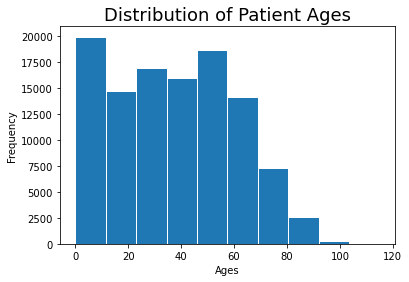

In [24]:
# Check the distribution of the ages of the patients
df_clean.Age.plot(kind= 'hist', edgecolor='white')
plt.title('Distribution of Patient Ages', fontsize = 18)
plt.xlabel('Ages', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10);

> This does not give a clear picture of the distribution of the patient ages because as initially established, several patients made more than one appointment. To get a more accurate visualization, we need to plot the histogram using ages for the unique patients only.

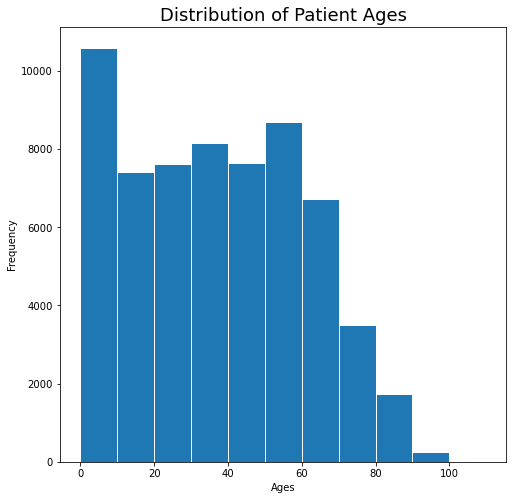

In [25]:
# Extract the data for the unique patients
unique_patients = df_clean.drop_duplicates(subset='PatientId', keep='first')

# Use the ages in this new dataset to examine the distribution of patient ages.
# unique_patients['Age'].plot(kind='hist')
ages = unique_patients['Age']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(ages, bins, edgecolor='white')
plt.title('Distribution of Patient Ages', fontsize = 18)
plt.xlabel('Ages', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10);

### Question 1 Response:
> #### The above visualization reveal that patients aged between 0 to 10 years book a higher number of appointments as compared to the other age groups. The number of appointments booked by patients aged between 90 years and 100 years is disproportionately low as compared to the other age groups.

## Research Question 2: Are male patients more likely to show up for an appointment as compared to female patients?

>To arrive at a conclusive and valid question for this research question, we need to compare the proportion of male patients who showed up for the appointment and the proportion of women who showed up for the appointment

### Step 1: separate the data into two dataframes
    male_df = Dataframe with only the appointments booked by male patients
    female_df = Dataframe with only the appointments booked by female patients

In [26]:
# Extract the appointments booked by males
male_df = df_clean.query('Gender == "M"')
male_df.head(2)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
1,5642503,5.589978e+14,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
11,5620163,7.542951e+12,M,2016-04-26T08:44:12Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes


In [27]:
# Verify that there are no Female entries in the male dataframe
male_df.query('Gender == "F"')
# This should display an empty dataset if there are no entries that have gender set as female.

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [28]:
# Extract the appointments booked by males
female_df = df_clean.query('Gender == "F"')
female_df.head(2)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,5642549,4.262962e+12,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [29]:
# Verify that there are no male entries in the female dataframe
female_df.query('Gender == "M"')
# This should display an empty dataset if there are no entries that have gender set as male.

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


### Step 2: Calculate the proportion of male patients who showed up for the appointment

> Based on the description of the proportion function defined above, we need to obtain the **total number of male patients** and **the number of male patients who showed up for the appointments**

In [30]:
# Find the total number of male patients who made appointments
total_males_appointments = male_df.AppointmentID.value_counts().sum()

# Find the number of male patients who showed up for the appointments
No_of_males_who_attended = male_df.query('No_show == "No"').value_counts().sum()

# Print out the obtained values
print(total_males_appointments)
print(No_of_males_who_attended)

38687
30962


In [31]:
# Invoke the proportion function to calculate the proportion of male patients who showed up for the appointments
prop_M_who_showed = proportion(total_males_appointments, No_of_males_who_attended)
prop_M_who_showed

0.8003205211052808

### Step 3: Calculate the proportion of female patients who showed up for the appointment

> This follows the same procedure as step 2 above

In [32]:
# Find the total number of female patients who made appointments
total_females_appointments = female_df.AppointmentID.value_counts().sum()

# Find the number of female patients who showed up for the appointments
No_of_females_who_attended = female_df.query('No_show == "No"').value_counts().sum()

# Print out the obtained values
print(total_females_appointments)
print(No_of_females_who_attended)

71839
57245


In [33]:
# Invoke the proportion function to calculate the proportion
prop_F_who_showed = proportion(total_females_appointments, No_of_females_who_attended)
prop_F_who_showed

0.7968512924734475

> Comparing the results from step 2 and 3, we can tell that the proportion of male patients who showed up for their appointments is slightly higher than that of the female patients. To get a clear picture of how these two proportions vary, we need to visualize them using a bar graph.

### Step 4: Visualize the proportions

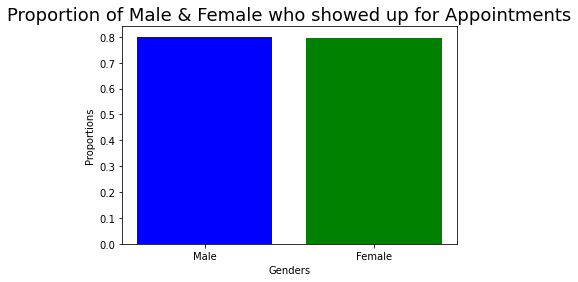

In [34]:
genders = ['Male','Female']
props = [prop_M_who_showed, prop_F_who_showed]
colors = ['blue','Green']
plt.bar(genders, props, color = colors)
plt.title('Proportion of Male & Female who showed up for Appointments', fontsize = 18)
plt.xlabel('Genders', fontsize = 10)
plt.ylabel('Proportions', fontsize = 10)

plt.show();

### Question 2 Response
> The visualization above shows that the proportion of males who showed up for the appointment is almost equal to the proportion of the females who showed up for the appointment

## Research Question 3: Are older patients more likely to show up for an appointment as compared to the younger patients?

> To respond to this question, we need to divide the cleaned dataset into two datasets, one to hold appointments for the older patients and one to hold the records for the younger patients. The young patients are those whose age is less than or equal to the median age while the older patients are those whose age falls above the median age. <br>
>> **young_df** : Dataframe for the young patients <br>
>> **older_df** : Datafram for the older patients

### Step 1: Determine the median age

In [35]:
median_age = df_clean['Age'].median()
median_age

37.0

### Step 2: Separate the dataset

In [36]:
# The young patients
young_df = df_clean.query('Age <= {}'.format(median_age))
young_df.head(2)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
3,5642828,8.679512e+11,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
6,5630279,7.336882e+14,F,2016-04-27T15:05:12Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


In [37]:
# The older patients
older_df = df_clean.query('Age > {}'.format(median_age))
older_df.head(2)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,5.589978e+14,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [38]:
# Verify that the two dataframes are disjoint
(older_df.AppointmentID.value_counts().sum())+(young_df.AppointmentID.value_counts().sum()) == df_clean.AppointmentID.value_counts().sum()
# This should return True if the two datasets are disjoint.

True

### Step 3: Find the proportion of young patients who showed up for appointments

In [39]:
# Find the total number of young patients
total_young = young_df.AppointmentID.value_counts().sum()
total_young

56116

In [40]:
# Find the number of young patients who showed up for their appointments
Num_Young_showed_up = young_df.query('No_show == "No"').value_counts().sum()
Num_Young_showed_up

43355

In [41]:
# Invoke the Proportion function to calculate the proportion of young patients who showed up for the appointment
prop_young = proportion(total_young, Num_Young_showed_up)
prop_young

0.7725960510371374

### Step 4: Find the proportion of older patients who showed up for appointments

In [42]:
# Find the total number of older patients
total_older = older_df.AppointmentID.value_counts().sum()
total_older

54410

In [43]:
# Find the number of young patients who showed up for their appointments
Num_Older_showed_up = older_df.query('No_show == "No"').value_counts().sum()
Num_Older_showed_up

44852

In [44]:
# Invoke the Proportion function to calculate the proportion of older patients who showed up for the appointment
prop_old = proportion(total_older, Num_Older_showed_up)
prop_old

0.8243337621760706

> Comparing the results obtained in step 3 and step 4, it is evident that the proportion of older patients who showed up for their appointment is higher than that of the younger patients who showed up for the appointment. <br>
**For better clarity, it is important to visualize these results**

### Step 5: Visualize the results

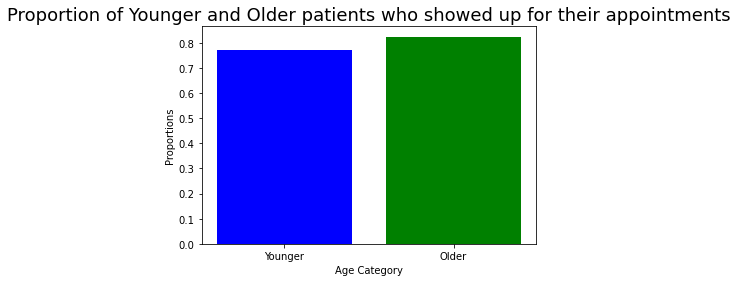

In [45]:
ages = ['Younger', 'Older']
age_proportions = [prop_young, prop_old]
colors = ['Blue', 'Green']
plt.bar(ages, age_proportions, color=colors)
plt.title('Proportion of Younger and Older patients who showed up for their appointments', fontsize = 18)
plt.xlabel('Age Category', fontsize = 10)
plt.ylabel('Proportions', fontsize = 10)

plt.show();

> The visualization clearly shows that the proportion of older patients who showed up for their appointments was a bit higher as compared to that of the younger patients

## Research Question 4: How do the location of a hospital affect appointment attendance?

> - To effectively respond to this question, it is necessary to identify the counts of the number of appointments made to hospitals in the varous neighbourhoods. <br>
> - It is also necessary to identify the total number of attended appointments in hospitals in every neighbourhood.

In [46]:
# Find the total number of appointments made for every neighbourhood
total_appointments_by_nbd = df_clean['Neighbourhood'].value_counts()
total_appointments_by_nbd

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [47]:
# Find the total number of attended appointments for every neighbourhood
total_attendants_by_nbd = df_clean.query('No_show == "No"')['Neighbourhood'].value_counts()
total_attendants_by_nbd

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

> Comparing the two results above:
**Note**: _In the total number of appointments made for every neighbourhood, there are 81 neighbourhoods while in the total number of attended appointments for every neighbourhood, there are 80 neighbourhoods._ <br>
> This is evident that there is one neighbourhood where some appointments were made, but none of the patients who filed for appointments showed up on the appointment day. <br>
**Let's check which neighbourhood it is**

In [48]:
# Check the neighbourhood where patients filed for appointments but never showed up
for i in total_appointments_by_nbd.index:
    if i not in total_attendants_by_nbd.index:
        print(i)

ILHAS OCEÂNICAS DE TRINDADE


> Patients in `ILHAS OCEÂNICAS DE TRINDADE` booked some appointments but did not show up. <br>
>>To avoid errors during analysis, we need to add this neighbourhood in the series holding results of the number of appointments made per neighbourhood, and assign a value **0** for this neighbourhood.

In [49]:
# Data to add
add_data = Series([0], index=['ILHAS OCEÂNICAS DE TRINDADE'])

# Make the update
total_attendants_by_nbd = pd.concat([total_attendants_by_nbd, add_data])

# Verify that the new record was entered successfully
total_attendants_by_nbd.count() == total_appointments_by_nbd.count() # Should return True

True

In [50]:
# Use the indexs to identify entries from similar neighbourhoods and use them to calculated the proportions as required
# att_props : attendance proportion for every neighbourhood

neighbourhood = [] # Holds the list of Neighbourhoods
attendance_proportion = [] # Holds the Patient proportion that showed up for the appointments
for i in total_appointments_by_nbd.index:
    for x in total_attendants_by_nbd.index:
        if x == i:
            att_props = proportion(total_appointments_by_nbd[i],total_attendants_by_nbd[x])
            
    #print(i, att_props)
    neighbourhood.append(i)
    attendance_proportion.append(att_props)
    

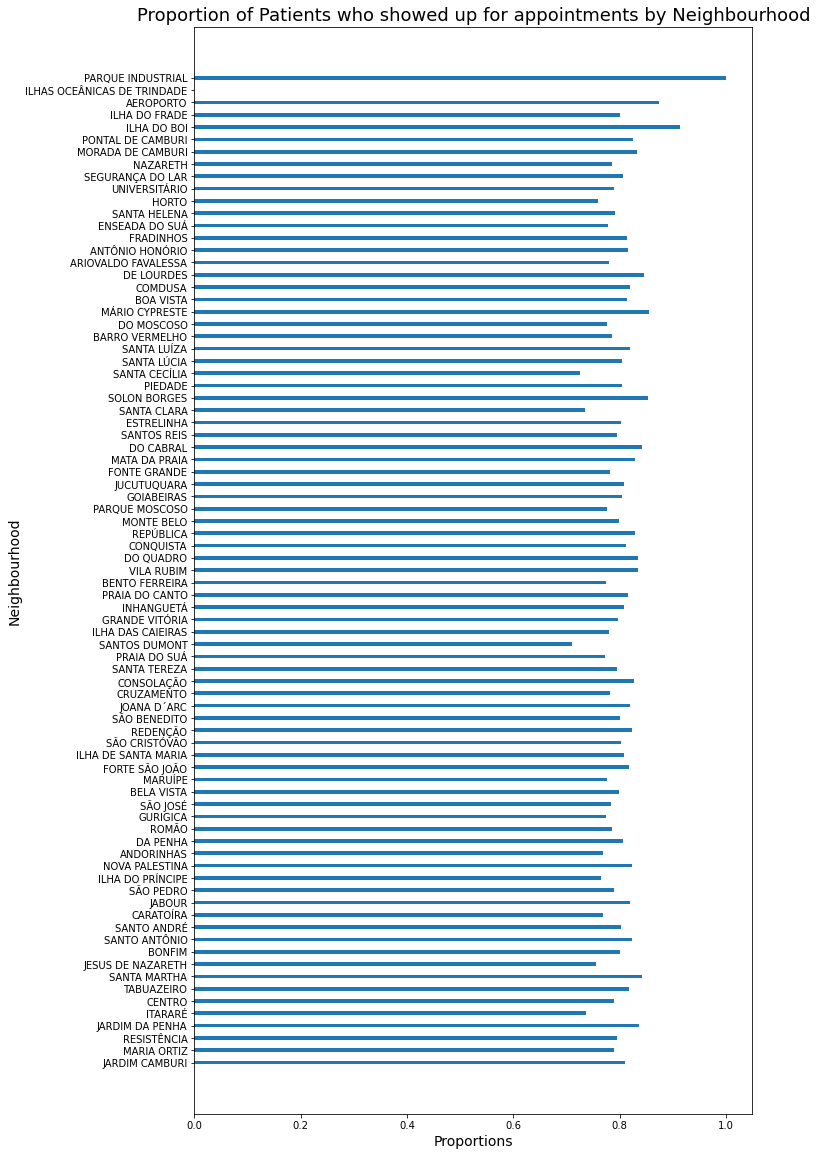

In [51]:
figure(figsize=(10,20))
plt.barh(neighbourhood, attendance_proportion, height=0.3)
plt.rcParams['font.size']='10'
plt.title('Proportion of Patients who showed up for appointments by Neighbourhood', fontsize = 18)
plt.xlabel('Proportions', fontsize = 14)
plt.ylabel('Neighbourhood', fontsize = 14);
#plt.yticks(fontsize=20)

In [52]:
min(attendance_proportion)

0.0

**Note**: For the neighbourhood with a proportion of patients who showed up for the appointment after booking as 0, only **two** patient had book for the appointment. We can ignore this when considering the lowest proportion of turn out since the bookings for this neighbourhood are very low

In [53]:
# remove 0 from the list of proportions
attendance_proportion.remove(0.0)
min(attendance_proportion)

0.7108150470219435

### `Question 4 Results`
> The visualization above shows that for hospitals located in some neighbourhoods, the proportion of patients who showed up for the appointment they booked was higher than in others. In almost all the neighbourhoods, the patient turn out after booking an appointment is more than 70%

## Research Question 5: Are patients who are enrolled in Brasilian welfare program more likely to show up for scheduled appointments?

> To respond to this question, we need to divide the cleaned dataset into two separate datasets, one holding the records who were enrolled in the Brasilian welfare program and the other holding the records for patients who were not enrolled in the program <br>
>> **enrolled_df** : Dataset holding records for the enrolled patients <br>
>> **n_enrolled_df** : Dataset holding records for the patients who were not enrolled <br>

> After separating the data, we will calculate the respective proportions

### Step 1: Separate the dataset

In [54]:
df_clean.columns

Index(['AppointmentID', 'PatientId', 'Gender', 'ScheduledDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [55]:
# Separating the dataset
enrolled_df = df_clean.query('Scholarship == 1')
n_enrolled_df = df_clean.query('Scholarship == 0')

In [56]:
# View the enrolled patients data
enrolled_df.head(2)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
12,5634718,5.666548e+14,F,2016-04-28T11:33:51Z,22,NOVA PALESTINA,1,0,0,0,0,0,No
17,5633460,1.479497e+13,F,2016-04-28T09:28:57Z,40,CONQUISTA,1,0,0,0,0,0,Yes


In [57]:
# View the un-enrolled patients data
n_enrolled_df.head(2)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,5.589978e+14,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


### Step 2: Find the proportion of the enrolled patients who showed up for the appointment

In [58]:
# find the total number of enrolled patients
tt_enrolled = enrolled_df.AppointmentID.value_counts().sum()
tt_enrolled

10861

In [59]:
# find the total number of enrolled patients who showed up for their appointment
tt_enrolled_show = enrolled_df.query('No_show == "No"').value_counts().sum()
tt_enrolled_show

8283

In [60]:
# Calculate the proportion of enrolled patients who showed up for the appointments
# Invoke the proportion function
enrolled_prop = proportion(tt_enrolled, tt_enrolled_show)
enrolled_prop

0.7626369579228433

### Step 3: Find the proportion of the patients who were not enrolled who showed up for the appointment

In [61]:
# find the total number of patients who were not enrolled in the program
tt_n_enrolled = n_enrolled_df.AppointmentID.value_counts().sum()
tt_n_enrolled

99665

In [62]:
# find the total number of patients who were not enrolled in the program who showed up for their appointment
tt_n_enrolled_show = n_enrolled_df.query('No_show == "No"').value_counts().sum()
tt_n_enrolled_show

79924

In [63]:
# Calculate the proportion of patients who were not enrolled in the program who showed up for the appointments
# Invoke the proportion function
n_enrolled_prop = proportion(tt_n_enrolled, tt_n_enrolled_show)
n_enrolled_prop

0.8019264536196258

### `Question 5 Response`
> comparing the results in step 2 and 3 above, we can conclude that patients who were not enrolled in the Brasilian welfare program were less likely to show up for appointments as compared to those who were not enrolled

### Step 4: Visualizing the Results

> To show the difference in the proportions, we will use the a pie chart

### `Question 5 Visual Response`

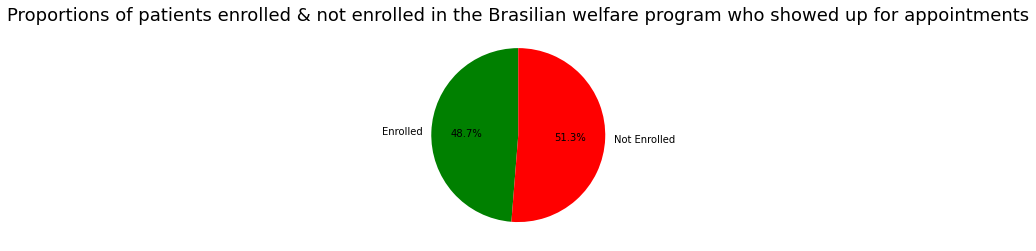

In [64]:
plot_proportions = [enrolled_prop, n_enrolled_prop]
m_labels = ['Enrolled', 'Not Enrolled']
m_colors = ['green', 'red']
plt.pie(plot_proportions, labels= m_labels, autopct='%1.1f%%', colors=m_colors ,startangle=90)
plt.title('Proportions of patients enrolled & not enrolled in the Brasilian welfare program who showed up for appointments', fontsize = 18)
plt.show();

> This pie chart shows that the proportion of the patients who were enrolled in the Brasilian welfare program were less likely to show up for appointments as compared to the patients who were not enrolled in the program

## Research Question 6: How do positive diagnosis of health conditions such as hipertension, Diabetes, Alcoholism, and Handcap affect appointment attendance?

> For this question, we will begin by examining how each individual health condition affects appointment attendance. Thereafter, we will check to see how the four conditions compare in terms of affecting whether the patients show up for appointments or not.

#### Research Question 6A: How do positive diagnosis of hipertension affect appointment attendance?

##### Split the clean dataset into two datasets, one with records of patients who had High Blood Pressure (HBP), and another with records of patients who did not have HBP
> **hbp_df** : records of patients with Hipertension <br>
> **n_hbp_df** : records of patients with no Hipertension


In [65]:
# Split the data
hbp_df = df_clean.query('Hipertension == 1')
n_hbp_df = df_clean.query('Hipertension == 0')

In [66]:
hbp_df.head(2)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
4,5642494,8.841186e+12,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [67]:
n_hbp_df.head(2)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
1,5642503,5.589978e+14,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,4.262962e+12,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


#### Step 1: Find the proportion of patients with hipertension who showed up for the appointment

In [68]:
# Find the total number of patients who were diagnosed with hipertension/High Blood Pressure (HBP)
tt_HBP_patient = hbp_df['AppointmentID'].value_counts().sum()
tt_HBP_patient

21801

In [69]:
# Find the number of patients with hipertension who showed up for the appointment
tt_HBP_patient_show = hbp_df.query('No_show == "No"').value_counts().sum()
tt_HBP_patient_show

18029

In [70]:
# proportion of patients with hipertension who showed up for the appointment
prop_HBP_patient_show = proportion(tt_HBP_patient, tt_HBP_patient_show)
prop_HBP_patient_show

0.8269804137424889

#### Step 2: Find the proportion of patients with no hipertension who showed up for the appointment

In [71]:
# Find the total number of patients who did not have hipertension/High Blood Pressure (HBP)
n_tt_HBP_patient = n_hbp_df['AppointmentID'].value_counts().sum()
n_tt_HBP_patient

88725

In [72]:
# Find the number of patients with no hipertension who showed up for the appointment
n_tt_HBP_patient_show = n_hbp_df.query('No_show == "No"').value_counts().sum()
n_tt_HBP_patient_show

70178

In [73]:
# proportion of patients with no hipertension who showed up for the appointment
prop_n_HBP_patient_show = proportion(n_tt_HBP_patient, n_tt_HBP_patient_show)
prop_n_HBP_patient_show

0.7909608340377571

#### Step 3: Visualize the results

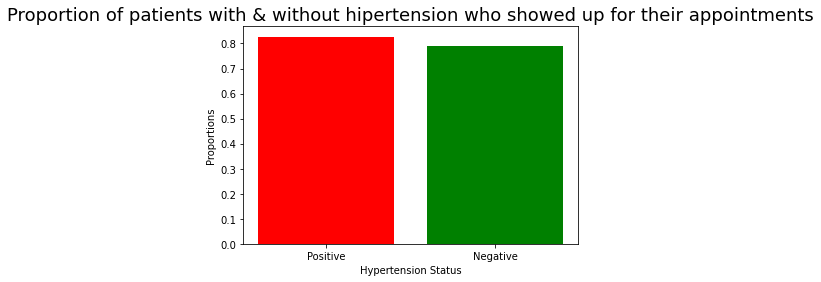

In [74]:
hbp_status = ['Positive', 'Negative']
hbp_proportions = [prop_HBP_patient_show, prop_n_HBP_patient_show]
colors = ['Red', 'Green']
plt.bar(hbp_status, hbp_proportions, color=colors)
plt.title('Proportion of patients with & without hipertension who showed up for their appointments', fontsize = 18)
plt.xlabel('Hypertension Status', fontsize = 10)
plt.ylabel('Proportions', fontsize = 10)

plt.show();

#### `Question 6A Response`
> The data indicates that the proportion of patients with hipertension who showed up for the appointment was higher than the proportion of patients without hipertension who showed up for the appointment.

#### Research Question 6b: How do positive diagnosis of Diabetes affect appointment attendance?

##### Step 1: Split the dataset
> __diabetic_df__ : appointment records of diabetic patients <br>
> __n_diabetic_df__ : appointment records of patients who did not have diabetes

In [75]:
# Split the data
diabetic_df = df_clean.query('Diabetes == 1')
n_diabetic_df = df_clean.query('Diabetes == 0')

In [76]:
diabetic_df.head(1)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
4,5642494,8.841186e+12,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [77]:
n_diabetic_df.head(1)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


##### Step 2: Find the proportion of the diabetic patients who showed up for the appointment

In [78]:
# Total number of diabetic patients
tt_diabetic = diabetic_df.AppointmentID.value_counts().sum()
tt_diabetic

7943

In [79]:
# Number of diabetic patients who showed up for the appointment
tt_diabetic_show = diabetic_df.query('No_show == "No"').value_counts().sum()
tt_diabetic_show

6513

In [80]:
# Proportion of diabetic patients who showed up for the appointments
prop_diabetic_show = proportion(tt_diabetic, tt_diabetic_show)
prop_diabetic_show

0.8199672667757774

##### Step 3: Find the proportion of the non-diabetic patients who showed up for the appointment

In [81]:
# Total number of non diabetic patients
tt_n_diabetic = n_diabetic_df.AppointmentID.value_counts().sum()
tt_n_diabetic

102583

In [82]:
# Number of diabetic non-patients who showed up for the appointment
n_diabetic_show = n_diabetic_df.query('No_show == "No"').value_counts().sum()
n_diabetic_show

81694

In [83]:
# Proportion of non_diabetic patients who showed up for the appointments
prop_n_diabetic_show = proportion(tt_n_diabetic, n_diabetic_show)
prop_n_diabetic_show

0.7963697688700857

##### Step 4: Visualize the results

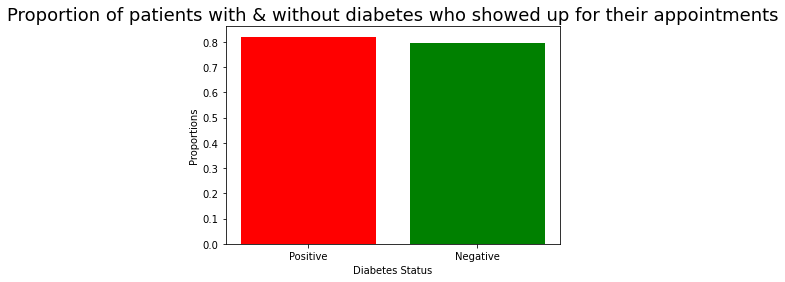

In [84]:
diabetes_status = ['Positive', 'Negative']
diabetes_proportions = [prop_diabetic_show, prop_n_diabetic_show]
colors = ['Red', 'Green']
plt.bar(diabetes_status, diabetes_proportions, color=colors)
plt.title('Proportion of patients with & without diabetes who showed up for their appointments', fontsize = 18)
plt.xlabel('Diabetes Status', fontsize = 10)
plt.ylabel('Proportions', fontsize = 10)

plt.show();

##### `Question 6B Results`
> This shows that the proportion of patients with diabetes who showed up for the appointment was higher than the proportion of patients without diabetes who showed up for the appointment

#### Research Question 6c: How do Alcoholism affect appointment attendance?

##### Step 1: Split the dataset
> __alcoholic_df__ : appointment records of alcoholic patients <br>
> __n_alcoholic_df__ : appointment records of patients who did not have alcoholism

In [85]:
# Split the data
alcoholic_df = df_clean.query('Alcoholism == 1')
n_alcoholic_df = df_clean.query('Alcoholism == 0')

In [86]:
alcoholic_df.head(1)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
46,5615608,1.379437e+11,M,2016-04-25T12:44:36Z,58,SÃO CRISTÓVÃO,0,1,0,1,0,1,No


In [87]:
n_alcoholic_df.head(1)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


##### Step 2: Find the proportion of the alcoholic patients who showed up for the appointment

In [88]:
# Total number of alcoholic patients
tt_alcoholic = alcoholic_df.AppointmentID.value_counts().sum()
tt_alcoholic

3360

In [89]:
# Number of alcoholic patients who showed up for the appointment
tt_alcoholic_show = alcoholic_df.query('No_show == "No"').value_counts().sum()
tt_alcoholic_show

2683

In [90]:
# Proportion of diabetic patients who showed up for the appointments
prop_alcoholic_show = proportion(tt_alcoholic, tt_alcoholic_show)
prop_alcoholic_show

0.7985119047619048

##### Step 3: Find the proportion of the non-alcoholic patients who showed up for the appointment

In [91]:
# Total number of non alcoholic patients
tt_n_alcoholic = n_alcoholic_df.AppointmentID.value_counts().sum()
tt_n_alcoholic

107166

In [92]:
# Number of diabetic non-alcoholic who showed up for the appointment
n_alcoholic_show = n_alcoholic_df.query('No_show == "No"').value_counts().sum()
n_alcoholic_show

85524

In [93]:
# Proportion of non_diabetic patients who showed up for the appointments
prop_n_alcoholic_show = proportion(tt_n_alcoholic, n_alcoholic_show)
prop_n_alcoholic_show

0.7980516208498964

##### Step 4: Visualize the results

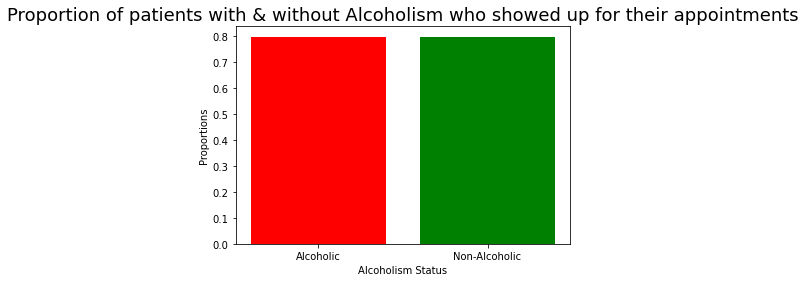

In [94]:
diabetes_status = ['Alcoholic', 'Non-Alcoholic']
diabetes_proportions = [prop_alcoholic_show, prop_n_alcoholic_show]
colors = ['Red', 'Green']
plt.bar(diabetes_status, diabetes_proportions, color=colors)
plt.title('Proportion of patients with & without Alcoholism who showed up for their appointments', fontsize = 18)
plt.xlabel('Alcoholism Status', fontsize = 10)
plt.ylabel('Proportions', fontsize = 10)

plt.show();

#### `Research question 6C Results`
> Since there is no significant difference between the proportion of alcoholic patients who showed up for appointments and the non-alcoholic patients who showed up for the appointments, We can conclude that Alcoholism does not significantly affect whether an individiual shows up for an appointment or not.

#### Research Question 6D: How do being HandCapped affect appointment attendance?

##### Step 1: Split the dataset
> __handcap_df__ : appointment records of HandCapped patients <br>
> __n_handcap_df__ : appointment records of patients who are not HandCapped

In [95]:
# Split the data
handcap_df = df_clean.query('Handcap == 1')
n_handcap_df = df_clean.query('Handcap == 0')

In [96]:
handcap_df.head(1)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
147,5639200,2.984854e+14,F,2016-04-29T08:48:03Z,65,UNIVERSITÁRIO,0,1,0,0,1,0,No


In [97]:
n_handcap_df.head(1)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


##### Step 2: Find the proportion of the handcap patients who showed up for the appointment

In [98]:
# Total number of handcap patients
tt_handcap = handcap_df.AppointmentID.value_counts().sum()
tt_handcap

2042

In [99]:
# Number of handcap patients who showed up for the appointment
tt_handcap_show = handcap_df.query('No_show == "No"').value_counts().sum()
tt_handcap_show

1676

In [100]:
# Proportion of handcap patients who showed up for the appointments
prop_handcap_show = proportion(tt_handcap, tt_handcap_show)
prop_handcap_show

0.8207639569049952

##### Step 3: Find the proportion of the non-handcap patients who showed up for the appointment

In [101]:
# Total number of non handcap patients
tt_n_handcap = n_handcap_df.AppointmentID.value_counts().sum()
tt_n_handcap

108285

In [102]:
# Number of diabetic non-handcap who showed up for the appointment
n_handcap_show = n_handcap_df.query('No_show == "No"').value_counts().sum()
n_handcap_show

86373

In [103]:
# Proportion of non_handcap patients who showed up for the appointments
prop_n_handcap_show = proportion(tt_n_handcap, n_handcap_show)
prop_n_handcap_show

0.7976451031998891

##### Step 4: Visualize the results

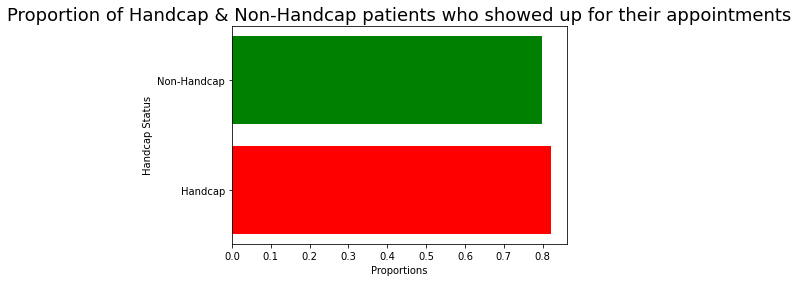

In [104]:
handcap_status = ['Handcap', 'Non-Handcap']
handcap_proportions = [prop_handcap_show, prop_n_handcap_show]
colors = ['Red', 'Green']
plt.barh(handcap_status, handcap_proportions, color=colors)
plt.title('Proportion of Handcap & Non-Handcap patients who showed up for their appointments', fontsize = 18)
plt.xlabel('Proportions', fontsize = 10)
plt.ylabel('Handcap Status', fontsize = 10)

plt.show();

#### `Research question 6D Results`
> This analysis shows that the handcapped patients are more likely to show up for appointments as compared to the non-handcap patients

## Research Question 7: Among hipertension, Diabetes, Alcoholism, and Handcap, which health condition was most common among the patients who booked the appointments?

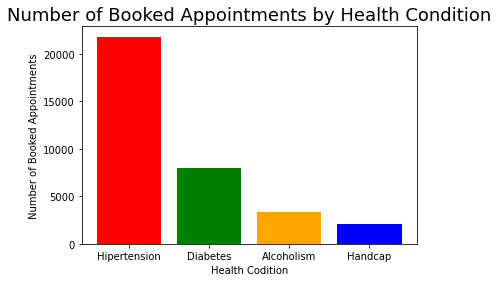

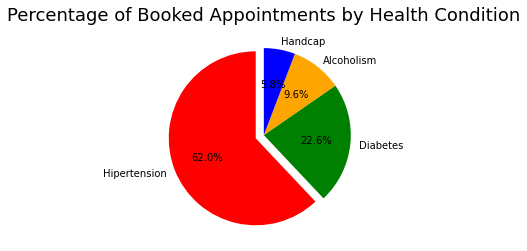

In [105]:
health_conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
condition_populations = [tt_HBP_patient, tt_diabetic, tt_alcoholic, tt_handcap]
colors = ['red', 'green', 'orange', 'blue']
plt.bar(health_conditions, condition_populations, color = colors)
plt.title('Number of Booked Appointments by Health Condition', fontsize = 18)
plt.xlabel('Health Codition', fontsize = 10)
plt.ylabel('Number of Booked Appointments', fontsize = 10)
plt.show();

# Visualize the same proportions using a pie chart
plt.pie(condition_populations, labels= health_conditions, autopct='%1.1f%%', explode=[0.1,0,0, 0], colors = colors, startangle=90)
plt.title('Percentage of Booked Appointments by Health Condition', fontsize = 18)
plt.show();

### `Research Question 7 Response`
> This shows that 62% of all the booked appointments were from diabetic patients. Only 5.8% were from Handcapped patients.

## Research Question 8: How do the proportion of patients with the various health conditions who showed up for the appointment compare?

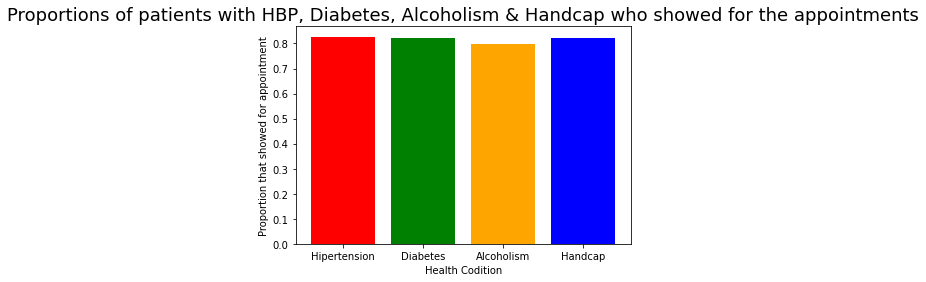

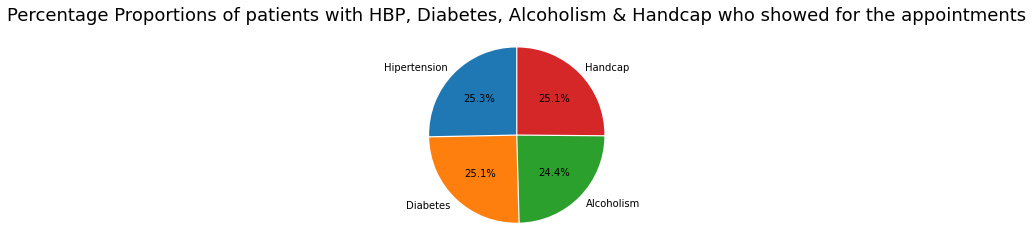

In [106]:
# Visualize the various proportions using a bar graph.
health_conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
condition_proportions = [prop_HBP_patient_show, prop_diabetic_show, prop_alcoholic_show, prop_handcap_show]
colors = ['red', 'green', 'orange', 'blue']
plt.bar(health_conditions, condition_proportions, color = colors)
plt.title('Proportions of patients with HBP, Diabetes, Alcoholism & Handcap who showed for the appointments', fontsize = 18)
plt.xlabel('Health Codition', fontsize = 10)
plt.ylabel('Proportion that showed for appointment', fontsize = 10)
plt.show()

# Visualize the same proportions using a pie chart
plt.pie(condition_proportions, labels= health_conditions, autopct='%1.1f%%', explode=[0.01,0.01,0.01, 0.01], startangle=90)
plt.title('Percentage Proportions of patients with HBP, Diabetes, Alcoholism & Handcap who showed for the appointments', fontsize = 18)
plt.show();


### `Research Question 8 Results`
> These visualizations clearly show that the proportions of patients with the various health conditions who showed for their appointments were almost equal.

<a id = conclusion></a>
# Conclusion

> **Findings**: Based on the analysis done on the dataset:-
>> 1. Patients aged between 0 to 10 years book a higher number of appointments as compared to the other age groups. The number of appointments booked by patients aged between 90 years and 100 years is disproportionately low as compared to the other age groups.<br>
>> 2. The proportion of males who showed up for the appointment is almost equal to the proportion of the females who showed up for the appointment. <br>
>> 3. The proportion of older patients who showed up for their appointment is higher than that of the younger patients who showed up for the appointment. <br>
>> 4. For hospitals located in some neighbourhoods, the proportion of patients who showed up for the appointment they booked was higher than in others. However, in all neighbourhoods, more than 70% of the patients who booked appointments showed up on for the appointment. <br>
>> 5. The proportion of the patients who were enrolled in the Brasilian welfare program and showed up for appointments was slightly lower compared to the proportion of patients who were not enrolled in the program and showed up for the appointments. <br>
>> 6. > a. The proportion of patients with hipertension who showed up for the appointment was higher than the proportion of patients without hipertension who showed up for the appointment. <br>
> b. The proportion of patients with diabetes who showed up for the appointment was higher than the proportion of patients without diabetes who showed up for the appointment. <br>
> c. Since there is no significant difference between the proportion of alcoholic patients who showed up for appointments and the non-alcoholic patients who showed up for the appointments, We can conclude that Alcoholism does not significantly affect whether an individiual shows up for an appointment or not.
> d. The proportion of Handcap patients who showed up for the appointment was higher than the proportion of patients who are not handcap who showed up for the appointment. <br>

>> 7. 62% of all the booked appointments were from diabetic patients. Only 5.8% were from Handcapped patients
>> 8. The proportions of patients with the various health conditions who showed for their appointments were almost equal.

> **Challenges**
>> 1. _This analysis only focused on correlation between the variables. Causation was not addressed_
>> 2. _Writing python functions to replace some repetitive tasks was challenging_